In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import json
import time

jsonPrettify = lambda x: json.dumps(x, indent=2)

# Data Preprocessing

Get data, display artist genres, followers and popularity

In [2]:
artistData = {}
with open('artistData.json') as f:
    artistData = json.load(f)
    
featData = pd.read_csv("topCharts.csv")

In [111]:
genres = []
followers = {}
popularity = {}
for artist, values in artistData.items():
    followers[artist] = values["Followers"]
    popularity[artist] = values["Popularity"]
    for genre in values["Genres"]:
        genres.append(genre)

In [4]:
checkArtists = ["Bing Crosby", "Lana Del Rey", "XXXTENTACION"]
checkArtists = ["Drake","Logic","The Chainsmokers"]
checkArtists = ["BTS", "Dan + Shay", "Future", "Post Malone", "Trippie Redd"]
for a in checkArtists:
    print(artistData[a])

{'Id': '3Nrfpe0tUJi4K4DXYWgMUX', 'Followers': 16783742, 'Popularity': 97, 'Genres': ['k-pop', 'k-pop boy group']}
{'Id': '7z5WFjZAIYejWy0NI5lv4T', 'Followers': 1482470, 'Popularity': 85, 'Genres': ['contemporary country', 'pop']}
{'Id': '1RyvyyTE3xzB2ZywiAwp0i', 'Followers': 8415384, 'Popularity': 94, 'Genres': ['atl hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']}
{'Id': '246dkjvS1zLTtiykXe5h60', 'Followers': 22726049, 'Popularity': 98, 'Genres': ['dfw rap', 'melodic rap', 'rap']}
{'Id': '6Xgp2XMz1fhVYe7i6yNAax', 'Followers': 4247414, 'Popularity': 92, 'Genres': ['melodic rap', 'rap', 'trap']}


In [77]:
print(jsonPrettify(artistData))

{
  "Post Malone": {
    "Id": "246dkjvS1zLTtiykXe5h60",
    "Followers": 22726049,
    "Popularity": 98,
    "Genres": [
      "dfw rap",
      "melodic rap",
      "rap"
    ]
  },
  "G-Eazy": {
    "Id": "02kJSzxNuaWGqwubyUba0Z",
    "Followers": 4311911,
    "Popularity": 87,
    "Genres": [
      "indie pop rap",
      "pop rap",
      "rap"
    ]
  },
  "Lil Pump": {
    "Id": "3wyVrVrFCkukjdVIdirGVY",
    "Followers": 6564499,
    "Popularity": 82,
    "Genres": [
      "emo rap",
      "miami hip hop",
      "rap",
      "trap"
    ]
  },
  "Cardi B": {
    "Id": "4kYSro6naA4h99UJvo89HB",
    "Followers": 10751128,
    "Popularity": 91,
    "Genres": [
      "pop",
      "pop rap",
      "rap"
    ]
  },
  "Camila Cabello": {
    "Id": "4nDoRrQiYLoBzwC5BhVJzF",
    "Followers": 15058704,
    "Popularity": 94,
    "Genres": [
      "dance pop",
      "pop",
      "post-teen pop"
    ]
  },
  "Offset": {
    "Id": "4DdkRBBYG6Yk9Ka8tdJ9BW",
    "Followers": 1462423,
    "Popularit

pop 430
rap 264
dance pop 242
pop rap 236
trap 198
post-teen pop 162
hip hop 152
southern hip hop 104
rock 84
tropical house 84
electropop 82
edm 82
contemporary country 80
adult standards 70
melodic rap 66
underground hip hop 66
atl hip hop 50
modern rock 50
country road 50
vapor trap 48
latin 48
pop rock 46
classic rock 46
mellow gold 46
country 46
uk pop 44
r&b 44
urban contemporary 40
electro house 38
soft rock 38
modern country rock 38
indie pop 36
indie poptimism 34
gangster rap 34
reggaeton 34
album rock 30
lounge 30
alternative r&b 28
hollywood 26
cali rap 26
vocal jazz 26
folk rock 24
singer-songwriter 24
conscious hip hop 22
viral pop 22
indietronica 22
brill building pop 22
latin pop 20
tropical 20
canadian pop 20
soul 20
escape room 20
big room 20
metropopolis 20
neo mellow 20
easy listening 20
miami hip hop 18
chicago rap 18
motown 18
show tunes 18
art pop 18
permanent wave 16
k-pop 14
folk 14
pop edm 14
dark trap 14
heartland rock 14
progressive electro house 12
dirty sou

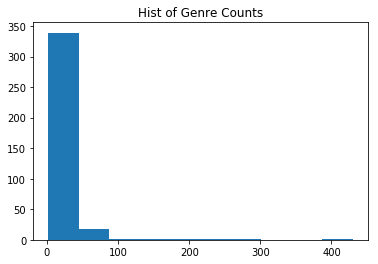

In [6]:
def genreCounts(data):
    genres = []
    for artist, values in data.items():
        for genre in values["Genres"]:
            genres.append(genre)
    cnt_Genre = Counter(genres)
    counts = []
    for k,v in cnt_Genre.most_common():
        counts.append(v)
        print(k, v)
    print(len(counts))
    plt.hist(counts)
    plt.title("Hist of Genre Counts")
    plt.show()
    
genreCounts(artistData)

In [7]:
sortedFol = sorted(followers.items(), key = lambda x: x[1],reverse=True)
for artist,fol in sortedFol:
    print(artist, fol)

Ed Sheeran 59926028
Drake 44895838
Ariana Grande 42791891
Rihanna 36449567
Justin Bieber 33264603
Eminem 33181011
Taylor Swift 27061766
Imagine Dragons 25574136
Coldplay 24703234
Shawn Mendes 24404572
Bruno Mars 24065750
Queen 24002626
Post Malone 22726049
Maroon 5 22645000
Beyoncé 22007725
Ozuna 21836480
Marshmello 21764962
Billie Eilish 21603244
David Guetta 21018985
Adele 20075254
Calvin Harris 19620387
Selena Gomez 19586586
Bad Bunny 19048815
The Weeknd 18958406
Alan Walker 18779257
Maluma 18773342
Shakira 18316957
XXXTENTACION 18148356
J Balvin 17932499
Nicki Minaj 17098240
Avicii 16965414
Daddy Yankee 16788545
BTS 16783742
Demi Lovato 16567282
Twenty One Pilots 16315982
Sia 15766946
Dua Lipa 15541182
The Chainsmokers 15538409
The Beatles 15382143
Camila Cabello 15058704
Katy Perry 14813254
AC/DC 14406655
Kendrick Lamar 14106675
Michael Jackson 13862348
Martin Garrix 12773091
Sam Smith 11815164
Kanye West 11252020
Miley Cyrus 11075871
Nicky Jam 11007892
BLACKPINK 10834626
ZAYN 107

In [8]:
sortedPop = sorted(popularity.items(), key = lambda x: x[1], reverse=True)
for artist, pop in sortedPop:
    print(artist, pop)

Justin Bieber 100
Eminem 99
Drake 99
J Balvin 99
Billie Eilish 99
Post Malone 98
Bad Bunny 98
Ed Sheeran 97
Travis Scott 97
BTS 97
The Weeknd 97
Ozuna 97
Juice WRLD 97
Khalid 96
Anuel AA 96
Roddy Ricch 96
Sech 96
Taylor Swift 95
XXXTENTACION 95
Daddy Yankee 95
Nicki Minaj 95
Ariana Grande 95
DaBaby 95
Camila Cabello 94
Dua Lipa 94
Halsey 94
A Boogie Wit da Hoodie 94
Future 94
Young Thug 94
Nicky Jam 94
Lil Baby 94
Selena Gomez 93
Maroon 5 93
Chris Brown 93
Kanye West 93
Lil Wayne 93
Harry Styles 93
Sam Smith 92
Shawn Mendes 92
Trippie Redd 92
Queen 92
Rihanna 92
Lewis Capaldi 92
KAROL G 92
Cardi B 91
Lil Uzi Vert 91
Kendrick Lamar 91
Imagine Dragons 91
The Chainsmokers 91
Bruno Mars 91
J. Cole 91
Maluma 91
The Beatles 91
YoungBoy Never Broke Again 91
Tyga 91
Mac Miller 91
Quavo 91
Gunna 91
Coldplay 91
Tones and I 91
Calvin Harris 90
blackbear 90
Lauv 90
Beyoncé 90
David Guetta 90
Ty Dolla $ign 90
Shakira 90
21 Savage 89
Marshmello 89
Sia 89
Kygo 89
Natti Natasha 89
Alan Walker 89
Diplo

# Attempting to group genres

In [19]:
import copy
topGenres = ["pop", "rap", "hip hop", "trap", "rock", "house", "edm", 
             "country", "adult standards", "latin", "r&b", "indie", "other"]

"""
Prints all the mismatches it finds from topGenres compared to cnt_Genre
"""
def checkMismatches():
    mismatches = 0
    for k,v in cnt_Genre.most_common():
        matchGenre = False
        for genre in topGenres:
            if genre in k:
                matchGenre = True
        if not matchGenre:
            print(k, v)
            mismatches += 1
    print(mismatches)

"""
Groups the genres in data to fit topGenres
"""
def groupArtistGenres(data):
    copyData = copy.deepcopy(data)
    for artist, values in copyData.items():
        hasMatch = False
        updatedGenres = set()
        for artistGenre in values["Genres"]:
            for genre in topGenres:
                if genre in artistGenre:
                    hasMatch = True
                    updatedGenres.add(genre)
#         print(updatedGenres, hasMatch, values["Genres"], topGenres)
        if not hasMatch:
            updatedGenres.add("other")
        copyData[artist]["Genres"] = list(updatedGenres)
        print(artist, values["Genres"])
    return copyData

genreData = groupArtistGenres(artistData)

Post Malone ['rap']
G-Eazy ['indie', 'rap', 'pop']
Lil Pump ['trap', 'rap', 'hip hop']
Cardi B ['rap', 'pop']
Camila Cabello ['pop']
Offset ['trap', 'rap', 'pop', 'hip hop']
Khalid ['r&b', 'pop']
Lil Uzi Vert ['trap', 'rap', 'pop']
Dua Lipa ['pop']
21 Savage ['trap', 'rap', 'hip hop']
Selena Gomez ['pop']
Kendrick Lamar ['rap', 'hip hop']
Migos ['trap', 'rap', 'pop', 'hip hop']
Famous Dex ['trap', 'rap', 'pop', 'hip hop']
A$AP Ferg ['trap', 'rap', 'pop', 'hip hop']
Logic ['rap', 'pop', 'hip hop']
Kodak Black ['trap', 'rap', 'pop', 'hip hop']
Maroon 5 ['rock', 'pop']
Luis Fonsi ['latin', 'pop']
Portugal. The Man ['indie', 'rock', 'pop']
Bebe Rexha ['pop']
Marshmello ['house']
Hailee Steinfeld ['pop']
NF ['rap', 'pop', 'hip hop']
Halsey ['indie', 'pop']
Ed Sheeran ['pop']
Gucci Mane ['trap', 'rap', 'pop', 'hip hop']
Imagine Dragons ['rock']
Sam Smith ['pop']
Eminem ['rap', 'hip hop']
Miguel ['rap', 'r&b', 'pop']
Travis Scott ['rap']
French Montana ['trap', 'rap', 'pop', 'hip hop']
Lil Xa

BEFORE: Post Malone, ['dfw rap', 'melodic rap', 'rap']
AFTER: Post Malone, ['rap']

BEFORE: G-Eazy, ['indie pop rap', 'pop rap', 'rap']
AFTER: G-Eazy, ['indie', 'rap', 'pop']

BEFORE: Lil Pump, ['emo rap', 'miami hip hop', 'rap', 'trap']
AFTER: Lil Pump, ['trap', 'rap', 'hip hop']

BEFORE: Cardi B, ['pop', 'pop rap', 'rap']
AFTER: Cardi B, ['rap', 'pop']

BEFORE: Camila Cabello, ['dance pop', 'pop', 'post-teen pop']
AFTER: Camila Cabello, ['pop']

BEFORE: Offset, ['atl hip hop', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
AFTER: Offset, ['trap', 'rap', 'pop', 'hip hop']

BEFORE: Khalid, ['alternative r&b', 'pop']
AFTER: Khalid, ['r&b', 'pop']

BEFORE: Lil Uzi Vert, ['melodic rap', 'philly rap', 'pop rap', 'rap', 'trap']
AFTER: Lil Uzi Vert, ['trap', 'rap', 'pop']

BEFORE: Dua Lipa, ['dance pop', 'pop', 'post-teen pop', 'uk pop']
AFTER: Dua Lipa, ['pop']

BEFORE: 21 Savage, ['atl hip hop', 'rap', 'trap']
AFTER: 21 Savage, ['trap', 'rap', 'hip hop']

BEFORE: Selena Gomez, ['

AFTER: Jonathan Groff, ['other']

BEFORE: Stunna 4 Vegas, ['rap', 'southern hip hop', 'trap']
AFTER: Stunna 4 Vegas, ['trap', 'rap', 'hip hop']

BEFORE: Don Toliver, ['hip hop', 'rap', 'trap']
AFTER: Don Toliver, ['trap', 'rap', 'hip hop']

BEFORE: Kristen Bell, ['disney', 'hollywood']
AFTER: Kristen Bell, ['other']

BEFORE: Josh Gad, ['hollywood', 'show tunes']
AFTER: Josh Gad, ['other']

BEFORE: Conan Gray, ['bedroom pop', 'indie pop', 'pop']
AFTER: Conan Gray, ['indie', 'pop']

BEFORE: TOKYO’S REVENGE, ['meme rap']
AFTER: TOKYO’S REVENGE, ['rap']

BEFORE: Joni Mitchell, ['canadian folk', 'canadian singer-songwriter', 'folk', 'folk rock', 'lilith', 'mellow gold', 'pop rock', 'rock', 'singer-songwriter', 'traditional folk']
AFTER: Joni Mitchell, ['rock', 'pop']

BEFORE: JACKBOYS, ['rap', 'trap']
AFTER: JACKBOYS, ['trap', 'rap']

BEFORE: Olivia Rodrigo, ['pop', 'post-teen pop']
AFTER: Olivia Rodrigo, ['pop']

BEFORE: fun., ['baroque pop', 'metropopolis', 'modern rock', 'pop', 'pop rock

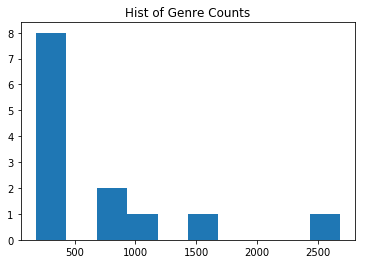

In [24]:
# checking it looks compared to previously

for artist, values in artistData.items():
    updatedValues = genreData[artist]
    print("BEFORE: {}, {}".format(artist, values["Genres"]))
    print("AFTER: {}, {}".format(artist, updatedValues["Genres"]))
    print("")

print("\n\n-----------------------\n\n")
genreCounts(genreData)

In [51]:
with open("groupedArtistData.json", "w") as f:
    json.dump(genreData, f)

# LR / NN regressor for num of days

In [232]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
standScaler = StandardScaler()

In [49]:
#remove non-values
featData = featData.drop(featData.index[featData["Tempo"] == 0], axis=0)

In [85]:
#normalize feat data
features = ["Rank", "Streams", "Duration", "Time Signature", "Tempo", "Key", "Mode", "Valence","Danceability","Energy"]
for feature in features:
    feat = np.array(featData[feature])
    featScaled = scaler.fit_transform(feat.reshape(-1,1))
    featData[feature] = featScaled

In [115]:
#normalize artist data
artists = []
followers = []
popularity = []
for artist, values in artistData.items():
    artists.append(artist)
    followers.append(values["Followers"])
    popularity.append(values["Popularity"])
    
artistDf = pd.DataFrame({"artist":artists,"followers":followers,"popularity":popularity})

features = ["followers","popularity"]
for feature in features:
    feat = np.array(artistDf[feature])
    featScaled = scaler.fit_transform(feat.reshape(-1,1))
    artistDf[feature] = featScaled
normalizedArtist = {}
for _, row in artistDf.iterrows():
    normalizedArtist[row["artist"]] = {"followers":row["followers"], "popularity":row["popularity"]}

In [87]:
featData.head()

,Unnamed: 0,Artist,Title,Rank,Streams,Date,Id,Duration,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness
0,0,Post Malone,rockstar,0.000000,0.240481,2018-01-01,0e7ipj03S05BNilyu5bRzt,0.205841,0.75,0.608065,0.454545,0.0,0.107779,0.525240,0.525044,0.12400,0.000070
1,1,G-Eazy,No Limit,0.005025,0.155463,2018-01-01,2DQ1ITjI0YoLFzuADN1ZBW,0.235663,0.75,0.694938,0.090909,1.0,0.397148,0.829327,0.785337,0.01170,0.000000
2,2,Lil Pump,Gucci Gang,0.010050,0.138218,2018-01-01,43ZyHQITOjhciSUUNPVRHc,0.102828,0.75,0.393452,0.454545,1.0,0.705389,0.947115,0.528155,0.23900,0.000000
3,3,Cardi B,Bartier Cardi (feat. 21 Savage),0.015075,0.128713,2018-01-01,0dIoGTQXDh1wVnhIiSyYEa,0.212561,0.75,0.490918,0.090909,1.0,0.086811,0.913462,0.529192,0.00111,0.000678
4,4,Camila Cabello,Havana,0.020101,0.125629,2018-01-01,1rfofaqEpACxVEHIZBJe6W,0.204921,0.75,0.313327,0.181818,1.0,0.385615,0.741587,0.528155,0.18400,0.000036


In [233]:
start_time = time.time()

songDayCount = {}
songFeats = {}
# getFeatures = ["Rank", "Streams", "Duration", "Time Signature", "Tempo", "Key", "Mode", "Valence","Danceability","Energy"]
getFeatures = ["Rank", "Streams", "Danceability","Energy","Streams"]
for _, row in featData.iterrows():
    name = row["Title"] + "/:/" + row["Artist"]
    artist = row["Artist"]
    songDayCount[name] = songDayCount.get(name,0) + 1
    if name not in songFeats:
        songFeats[name] = {feature:row[feature] for feature in getFeatures}
        art = normalizedArtist.get(artist,{"followers":0,"popularity":0})
        songFeats[name]["Followers"] = art["followers"]
        songFeats[name]["Popluarity"] = art["popularity"]
        songFeats[name]["MinRank"] = row["Rank"]
        songFeats[name]["MaxRank"] = row["Rank"]
        songFeats[name]["MinStreams"] = row["Streams"]
        songFeats[name]["MaxStreams"] = row["Streams"]
    else:
        songFeats[name]["MinRank"] = min(row["Rank"], songFeats[name]["MinRank"])
        songFeats[name]["MaxRank"] = max(row["Rank"], songFeats[name]["MaxRank"])
        songFeats[name]["MinStreams"] = min(row["Streams"], songFeats[name]["MinStreams"])
        songFeats[name]["MaxStreams"] = max(row["Streams"], songFeats[name]["MaxStreams"])
        songFeats[name]["Streams"] += row["Streams"]
        songFeats[name]["Rank"] += row["Rank"]

for k, v in songFeats.items():
    songFeats[k]["Rank"] /= songDayCount[k]
    songFeats[k]["Streams"] /= songDayCount[k]
    
# Normalize songDayCount
normalizeY = False
if normalizeY:
    songs = []
    counts = []
    for k, v in songDayCount.items():
        songs.append(k)
        counts.append(v)
    counts = np.array(counts)
    counts = standardScaler.fit_transform(counts.reshape(-1,1)).tolist()
    for i in range(len(songs)):
        songDayCount[songs[i]] = counts[i][0]

print("Time to featurize data: {}".format(time.time() - start_time))
print(jsonPrettify(songFeats))

Time to featurize data: 29.28668713569641
{
  "rockstar/:/Post Malone": {
    "Rank": 0.05921850632472709,
    "Streams": 0.14571855432087674,
    "Danceability": 0.5252403846153845,
    "Energy": 0.5250440734211345,
    "Followers": 0.3792350088424018,
    "Popluarity": 0.98,
    "MinRank": 0.0,
    "MaxRank": 0.1959798994974875,
    "MinStreams": 0.08612402623835581,
    "MaxStreams": 0.24048111998775218
  },
  "No Limit/:/G-Eazy": {
    "Rank": 0.5132639943905575,
    "Streams": 0.04529158865029912,
    "Danceability": 0.8293269230769229,
    "Energy": 0.7853365135331326,
    "Followers": 0.07195386191635667,
    "Popluarity": 0.87,
    "MinRank": 0.0050251256281407045,
    "MaxRank": 1.0,
    "MinStreams": 0.0032184481195821173,
    "MaxStreams": 0.17779909300393976
  },
  "Gucci Gang/:/Lil Pump": {
    "Rank": 0.47162039706730396,
    "Streams": 0.03922039795035909,
    "Danceability": 0.9471153846153846,
    "Energy": 0.5281551384423935,
    "Followers": 0.10954333931637648,
    

## Plot Histogram of day count

+ Plots histogram of count
+ Plots scatterplot of the length
+ Also filtering function to check the count for bins

Total:3400
Count between 0 and 7 days:1623
Count between 7 and 14 days:453
Count between 14 and 21 days:178
Count between 21 and 30 days:194
Count between 30 and 60 days:303
Count between 60 and 90 days:183
Count between 90 and 120 days:104
Count between 120 and 150 days:75
Count between 150 and 180 days:63
Count between 180 and 210 days:42
Count between 210 and 240 days:34
Count between 240 and 270 days:18
Count between 270 and 300 days:19
Count between 300 and 330 days:15
Count between 330 and 365 days:12
Count greater than 365: 84


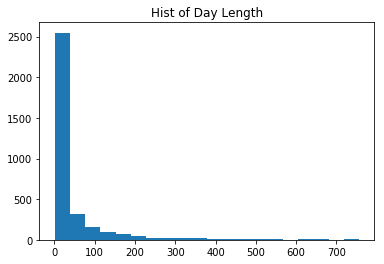

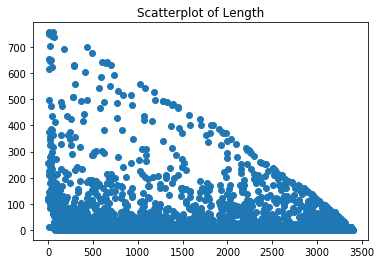

In [245]:
dayCount = list(songDayCount.values())
print("Total:{}".format(len(dayCount)))
weeks = [0, 7, 14, 21, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 365]
for i in range(len(weeks) - 1):
    lower = weeks[i]
    upper = weeks[i+1]
    filtered = list(filter(lambda x: x < upper and x >= lower, dayCount))
    print("Count between {} and {} days:{}".format(lower, upper, len(filtered)))
filtered = list(filter(lambda x: x >= weeks[-1], dayCount))
print("Count greater than {}: {}".format(weeks[-1], len(filtered)))

plt.hist(dayCount, bins=20)
plt.title("Hist of Day Length")
plt.show()
plt.scatter(list(range(len(dayCount))),songDayCount.values())
plt.title("Scatterplot of Length")
plt.show()

## Parse features as input, running models

+ Parse as np input
+ RF regression and linear regression models

In [255]:
X = []
y = []
x_feats = []
# putting all features together + removing features
for song, values in songFeats.items():
    x_feats = np.array(list(values.keys()))
    if songDayCount[song] <= 365: # don't do songs above a year
        y.append(songDayCount[song])
        X.append(list(values.values()))
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [251]:
#attempting cross validation
def cross_val(model):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, cv=5)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# cross_val(RandomForestRegressor(n_estimators=300))

[0.03175665 0.04412556 0.04615342 0.04620022 0.05805874 0.063789
 0.09470659 0.16078969 0.16942921 0.28499092]
['Popluarity' 'Energy' 'Followers' 'Streams' 'Danceability' 'MaxStreams'
 'Rank' 'MaxRank' 'MinStreams' 'MinRank']
1592.5852226405623


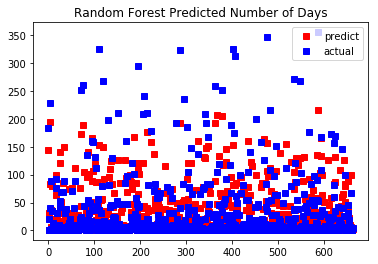

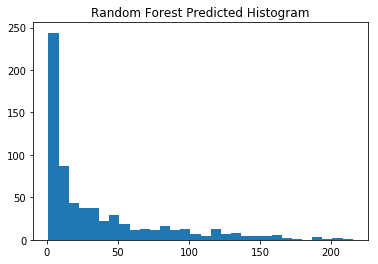

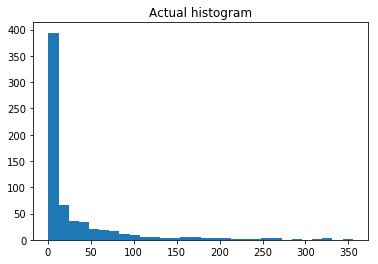

2690.642918877533


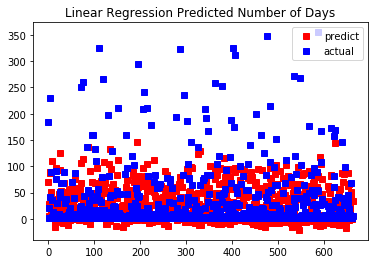

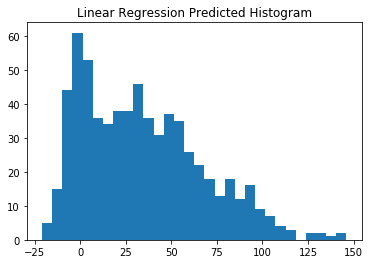

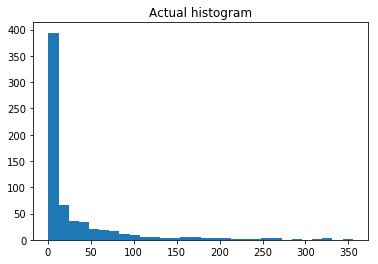

In [256]:
def draw_results(y_test, name, predict):
    x_axis = list(range(len(y_test)))
    predictLine, = plt.plot(x_axis,predict,"rs",label="predict")
    actualLine, = plt.plot(x_axis,y_test,"bs",label="actual")
#     plt.plot(x_axis,predict, "rs", x_axis, y_test, "bs")
    plt.title(name + " " + "Predicted Number of Days")
    plt.legend(handles=[predictLine, actualLine])
    plt.show()
    plt.hist(predict, bins=30)
    plt.title(name + " " + "Predicted Histogram")
    plt.show()
    plt.hist(y_test, bins=30)
    plt.title("Actual histogram")
    plt.show()

def train_model(model, model_name, X_train, y_train, X_test, y_test, printFeats = False):
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    MSE = sum(np.square(y_test - predict)) / len(predict)
    if printFeats:
        print(np.sort(model.feature_importances_))
        print(x_feats[np.argsort(model.feature_importances_)])
    print(MSE)
    draw_results(y_test, model_name, predict)

models = [RandomForestRegressor(n_estimators = 300), LinearRegression()]
model_names = ["Random Forest", "Linear Regression"]
for i,model in enumerate(models):
    if i==0:
        train_model(model, model_names[i], X_train, y_train, X_test, y_test, True)
    else:
        train_model(model, model_names[i], X_train, y_train, X_test, y_test)

## Attempting to do NN regression

+ pytorch

In [214]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import torch.utils.data as Data
import time

jupyter = True
if jupyter:
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm

In [253]:
class FFRegression(nn.Module):
    def __init__(self, input_size, output_size, hidden, hidden2, hidden3):
        super(FFRegression, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden)
        self.activation = nn.ReLU()
        self.loss = nn.MSELoss()
        self.linear2 = nn.Linear(hidden, hidden2)
#         self.linear3 = nn.Linear(hidden2, hidden3)
        self.output = nn.Linear(hidden2, output_size)

    def compute_loss(self, predicted_vector, label):
        return self.loss(predicted_vector, label)
    
    def forward(self, inputs):
        h1 = self.activation(self.linear1(inputs))
        h2 = self.activation(self.linear2(h1))
#         h3 = self.activation(self.linear3(h2))
        out = self.output(h2)
        return out

Training started for epoch:1



Training completed for epoch: 1
Time for train: 4.321092128753662
MSE: 11119504.169524213
Validation started for epoch:1



Validation completed for epoch:1
Time for validation:0.482266902923584
MSE: 4171.911941836383
--------------------


Training started for epoch:2



Training completed for epoch: 2
Time for train: 3.3418478965759277
MSE: 12019586.598640185
Validation started for epoch:2



Validation completed for epoch:2
Time for validation:0.3464069366455078
MSE: 4508.931581103879
--------------------


Training started for epoch:3



Training completed for epoch: 3
Time for train: 2.5626587867736816
MSE: 11880681.662864657
Validation started for epoch:3



Validation completed for epoch:3
Time for validation:0.3445279598236084
MSE: 4230.4004897513505
--------------------


Training started for epoch:4



Training completed for epoch: 4
Time for train: 2.7977092266082764
MSE: 12461105.338696543
Validation started for epoch:4



Validation completed for epoch:4
Time for validation:0.23663020133972168
MSE: 4218.220664793063
--------------------


Training started for epoch:5



Training completed for epoch: 5
Time for train: 2.4579782485961914
MSE: 11993239.342504418
Validation started for epoch:5



Validation completed for epoch:5
Time for validation:0.31060123443603516
MSE: 4269.363760247977
--------------------


Training started for epoch:6



Training completed for epoch: 6
Time for train: 2.4017481803894043
MSE: 11911383.587926263
Validation started for epoch:6



Validation completed for epoch:6
Time for validation:0.2506370544433594
MSE: 4456.00511554116
--------------------


Training started for epoch:7



Training completed for epoch: 7
Time for train: 2.3876800537109375
MSE: 12368167.163727216
Validation started for epoch:7



Validation completed for epoch:7
Time for validation:0.2469329833984375
MSE: 4349.1375119319455
--------------------


Training started for epoch:8



Training completed for epoch: 8
Time for train: 2.3177740573883057
MSE: 12373790.203248648
Validation started for epoch:8



Validation completed for epoch:8
Time for validation:0.2498171329498291
MSE: 4931.7619267815935
--------------------


Training started for epoch:9



Training completed for epoch: 9
Time for train: 2.826874017715454
MSE: 12734805.177513076
Validation started for epoch:9



Validation completed for epoch:9
Time for validation:0.3367879390716553
MSE: 5806.747059697894
--------------------


Training started for epoch:10



Training completed for epoch: 10
Time for train: 2.533179998397827
MSE: 12648002.806472685
Validation started for epoch:10



Validation completed for epoch:10
Time for validation:0.24329209327697754
MSE: 5026.778361168788
--------------------


Training started for epoch:11



Training completed for epoch: 11
Time for train: 1.9668829441070557
MSE: 13137885.112322595
Validation started for epoch:11



Validation completed for epoch:11
Time for validation:0.25527000427246094
MSE: 4787.999603461422
--------------------


Training started for epoch:12



Training completed for epoch: 12
Time for train: 1.9564542770385742
MSE: 13089865.860910088
Validation started for epoch:12



Validation completed for epoch:12
Time for validation:0.23991012573242188
MSE: 4630.21951919006
--------------------


Training started for epoch:13



Training completed for epoch: 13
Time for train: 1.9611990451812744
MSE: 12911852.646594893
Validation started for epoch:13



Validation completed for epoch:13
Time for validation:0.22654223442077637
MSE: 4202.0299086432715
--------------------


Training started for epoch:14



Training completed for epoch: 14
Time for train: 2.2286112308502197
MSE: 13188155.486488858
Validation started for epoch:14



Validation completed for epoch:14
Time for validation:0.31171298027038574
MSE: 5837.462873689578
--------------------


Training started for epoch:15



Training completed for epoch: 15
Time for train: 2.5777390003204346
MSE: 13233930.635645602
Validation started for epoch:15



Validation completed for epoch:15
Time for validation:0.2910501956939697
MSE: 4851.137584967721
--------------------


Training started for epoch:16



Training completed for epoch: 16
Time for train: 2.5849170684814453
MSE: 13161438.772215325
Validation started for epoch:16



Validation completed for epoch:16
Time for validation:0.48687100410461426
MSE: 5076.586696843774
--------------------


Training started for epoch:17



Training completed for epoch: 17
Time for train: 2.906834840774536
MSE: 13680343.614464097
Validation started for epoch:17



Validation completed for epoch:17
Time for validation:0.24951386451721191
MSE: 5427.761551224534
--------------------


Training started for epoch:18



Training completed for epoch: 18
Time for train: 2.6083109378814697
MSE: 13525540.443170434
Validation started for epoch:18



Validation completed for epoch:18
Time for validation:0.2541980743408203
MSE: 4599.933799191239
--------------------


Training started for epoch:19



Training completed for epoch: 19
Time for train: 2.298168659210205
MSE: 13246102.20407331
Validation started for epoch:19



Validation completed for epoch:19
Time for validation:0.24981403350830078
MSE: 5731.254860093238
--------------------


Training started for epoch:20



Training completed for epoch: 20
Time for train: 1.9972500801086426
MSE: 13412919.18335498
Validation started for epoch:20



Validation completed for epoch:20
Time for validation:0.43752026557922363
MSE: 4678.140214025632
--------------------


Training started for epoch:21



Training completed for epoch: 21
Time for train: 2.762071132659912
MSE: 13953171.274664665
Validation started for epoch:21



Validation completed for epoch:21
Time for validation:0.43079495429992676
MSE: 5142.171340097467
--------------------


Training started for epoch:22



Training completed for epoch: 22
Time for train: 2.689823865890503
MSE: 14178958.363352004
Validation started for epoch:22



Validation completed for epoch:22
Time for validation:0.24469399452209473
MSE: 6256.29655362942
--------------------


Training started for epoch:23



Training completed for epoch: 23
Time for train: 2.821924924850464
MSE: 13467789.439058688
Validation started for epoch:23



Validation completed for epoch:23
Time for validation:0.2733156681060791
MSE: 4662.327379001246
--------------------


Training started for epoch:24



Training completed for epoch: 24
Time for train: 2.841562032699585
MSE: 13333731.401055882
Validation started for epoch:24



Validation completed for epoch:24
Time for validation:0.2704601287841797
MSE: 6086.4760862003095
--------------------


Training started for epoch:25



Training completed for epoch: 25
Time for train: 3.0423238277435303
MSE: 13673345.163407305
Validation started for epoch:25



Validation completed for epoch:25
Time for validation:0.2949378490447998
MSE: 4961.245462836921
--------------------


Training started for epoch:26



Training completed for epoch: 26
Time for train: 3.471606969833374
MSE: 13862830.350075439
Validation started for epoch:26



Validation completed for epoch:26
Time for validation:0.46178507804870605
MSE: 4758.906119144621
--------------------


Training started for epoch:27



Training completed for epoch: 27
Time for train: 3.9487087726593018
MSE: 14000937.919118015
Validation started for epoch:27



Validation completed for epoch:27
Time for validation:0.2575831413269043
MSE: 4880.387148049447
--------------------


Training started for epoch:28



Training completed for epoch: 28
Time for train: 3.1018598079681396
MSE: 13820536.285561522
Validation started for epoch:28



Validation completed for epoch:28
Time for validation:0.633155107498169
MSE: 4509.547609147884
--------------------


Training started for epoch:29



Training completed for epoch: 29
Time for train: 2.821225881576538
MSE: 13805614.471576847
Validation started for epoch:29



Validation completed for epoch:29
Time for validation:0.27742981910705566
MSE: 4439.458778497146
--------------------


Training started for epoch:30



Training completed for epoch: 30
Time for train: 3.3999180793762207
MSE: 13860058.23768828
Validation started for epoch:30



Validation completed for epoch:30
Time for validation:0.28205394744873047
MSE: 6373.112254305221
--------------------


Training started for epoch:31



Training completed for epoch: 31
Time for train: 3.49172306060791
MSE: 14295586.632454071
Validation started for epoch:31



Validation completed for epoch:31
Time for validation:0.3376138210296631
MSE: 4746.375954819983
--------------------


Training started for epoch:32



Training completed for epoch: 32
Time for train: 2.905225992202759
MSE: 14037940.120074503
Validation started for epoch:32



Validation completed for epoch:32
Time for validation:0.28283214569091797
MSE: 4704.584930761333
--------------------


Training started for epoch:33



Training completed for epoch: 33
Time for train: 2.6650757789611816
MSE: 13941862.566516573
Validation started for epoch:33



Validation completed for epoch:33
Time for validation:0.2858152389526367
MSE: 4877.2249008535155
--------------------


Training started for epoch:34



Training completed for epoch: 34
Time for train: 3.0775227546691895
MSE: 14161816.790978307
Validation started for epoch:34



Validation completed for epoch:34
Time for validation:0.2930281162261963
MSE: 5328.059210906512
--------------------


Training started for epoch:35



Training completed for epoch: 35
Time for train: 2.8486342430114746
MSE: 14046542.997512655
Validation started for epoch:35



Validation completed for epoch:35
Time for validation:0.2896769046783447
MSE: 5881.146555289997
--------------------


Training started for epoch:36



Training completed for epoch: 36
Time for train: 2.1563899517059326
MSE: 14074943.0387691
Validation started for epoch:36



Validation completed for epoch:36
Time for validation:0.23672890663146973
MSE: 5286.038502118783
--------------------


Training started for epoch:37



Training completed for epoch: 37
Time for train: 1.994729995727539
MSE: 13945305.779359713
Validation started for epoch:37



Validation completed for epoch:37
Time for validation:0.24565410614013672
MSE: 4635.481917503177
--------------------


Training started for epoch:38



Training completed for epoch: 38
Time for train: 2.450261116027832
MSE: 14267152.014373057
Validation started for epoch:38



Validation completed for epoch:38
Time for validation:0.4168429374694824
MSE: 6541.405064746552
--------------------


Training started for epoch:39



Training completed for epoch: 39
Time for train: 2.8377909660339355
MSE: 14060373.263937226
Validation started for epoch:39



Validation completed for epoch:39
Time for validation:0.3344419002532959
MSE: 4687.6909692566005
--------------------


Training started for epoch:40



Training completed for epoch: 40
Time for train: 2.042931079864502
MSE: 13969249.002193892
Validation started for epoch:40



Validation completed for epoch:40
Time for validation:0.2525670528411865
MSE: 4418.2498585344765
--------------------


Training started for epoch:41



Training completed for epoch: 41
Time for train: 2.1323111057281494
MSE: 14098561.274712518
Validation started for epoch:41



Validation completed for epoch:41
Time for validation:0.2413790225982666
MSE: 4684.064373788802
--------------------


Training started for epoch:42



Training completed for epoch: 42
Time for train: 2.2060561180114746
MSE: 14394967.784827884
Validation started for epoch:42



Validation completed for epoch:42
Time for validation:0.20608901977539062
MSE: 5241.847818067746
--------------------


Training started for epoch:43



Training completed for epoch: 43
Time for train: 2.2387847900390625
MSE: 14210775.09661705
Validation started for epoch:43



Validation completed for epoch:43
Time for validation:0.20359015464782715
MSE: 4819.8820111200685
--------------------


Training started for epoch:44



Training completed for epoch: 44
Time for train: 2.2783098220825195
MSE: 14053824.6395717
Validation started for epoch:44



Validation completed for epoch:44
Time for validation:0.2669339179992676
MSE: 5390.757490252926
--------------------


Training started for epoch:45



Training completed for epoch: 45
Time for train: 2.124162197113037
MSE: 14110440.905121997
Validation started for epoch:45



Validation completed for epoch:45
Time for validation:0.3120248317718506
MSE: 5607.8663030484695
--------------------


Training started for epoch:46



Training completed for epoch: 46
Time for train: 2.2526509761810303
MSE: 14297643.70011056
Validation started for epoch:46



Validation completed for epoch:46
Time for validation:0.2214357852935791
MSE: 4613.936860409322
--------------------


Training started for epoch:47



Training completed for epoch: 47
Time for train: 2.2563321590423584
MSE: 14053953.667840159
Validation started for epoch:47



Validation completed for epoch:47
Time for validation:0.2292799949645996
MSE: 5240.1941685631555
--------------------


Training started for epoch:48



Training completed for epoch: 48
Time for train: 2.192730188369751
MSE: 14302909.013245486
Validation started for epoch:48



Validation completed for epoch:48
Time for validation:0.2655611038208008
MSE: 5921.222389330871
--------------------


Training started for epoch:49



Training completed for epoch: 49
Time for train: 1.942241907119751
MSE: 14542347.203426782
Validation started for epoch:49



Validation completed for epoch:49
Time for validation:0.24158906936645508
MSE: 5439.2006651922975
--------------------


Training started for epoch:50



Training completed for epoch: 50
Time for train: 2.231659173965454
MSE: 14087586.234301597
Validation started for epoch:50



Validation completed for epoch:50
Time for validation:0.21482491493225098
MSE: 4759.056611478253
--------------------




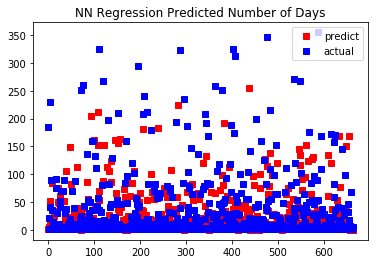

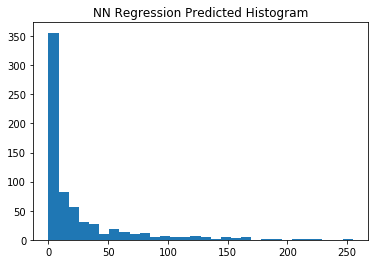

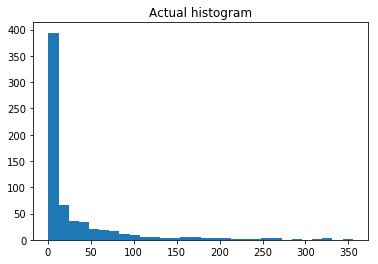

In [258]:
EPOCH = 50
minibatch_size = 16
train_feats = [(X_train[i],y_train[i]) for i in range(len(X_train))]
test_feats = [(X_test[i],y_test[i]) for i in range(len(X_test))]

model = FFRegression(input_size = len(x_feats), output_size = 1, hidden=200, hidden2=100, hidden3=50)
optimizer = optim.Adam(model.parameters(),lr=0.01)
for epoch in range(EPOCH):
    model.train()
    optimizer.zero_grad()
    print("Training started for epoch:{}".format(epoch + 1))
    random.shuffle(train_feats)
    random.shuffle(test_feats)
    start_time = time.time()
    N = len(X_train)
    predictions = [0] * len(y_train)
    for minibatch_idx in tqdm(range(N // minibatch_size)):
        optimizer.zero_grad()
        loss = 0
        for idx in range(minibatch_size):
            x_input, y_input = train_feats[minibatch_idx * minibatch_size + idx]
            prediction = model(torch.tensor(x_input,dtype=torch.float))
            predictions[minibatch_idx * minibatch_size + idx] = prediction.detach().numpy()[0]
#             loss = model.compute_loss(prediction,torch.tensor(y_input))
#             loss.backward()
#             optimizer.step()
            pred_loss = model.compute_loss(prediction, torch.tensor(y_input,dtype=torch.float))
            loss += pred_loss
        loss = loss / minibatch_size
        loss.backward()
        optimizer.step()
    diff = np.array(y_train - predictions)
    MSE = sum(np.square(diff))
    print("Training completed for epoch: {}".format(epoch + 1))
    print("Time for train: {}".format(time.time() - start_time))
    print("MSE: {}".format(MSE))
    
    #validation
    model.eval()
    optimizer.zero_grad()
    print("Validation started for epoch:{}".format(epoch + 1))
    start_time = time.time()
    N = len(X_test)
    predictions = [0] * len(y_test)
    for minibatch_idx in tqdm(range(N // minibatch_size)):
        optimizer.zero_grad()
        for idx in range(minibatch_size):
            x_input, y_input = train_feats[minibatch_idx * minibatch_size + idx]
            prediction = model(torch.tensor(x_input,dtype=torch.float))
            predictions[minibatch_idx * minibatch_size + idx] = prediction.detach().numpy()[0]
    diff = np.array(y_test - predictions)
    MSE = sum(np.square(diff)) / len(predictions)
    print("Validation completed for epoch:{}".format(epoch + 1))
    print("Time for validation:{}".format(time.time() - start_time))
    print("MSE: {}".format(MSE))
    print("--------------------\n\n")
draw_results(y_test, "NN Regression", predictions)

# Linear Regression / NN regressor for song trend

In [44]:
#linear regression time
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import datetime

In [54]:
featData.head()

,Unnamed: 0,Artist,Title,Rank,Streams,Date,Id,Duration,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness
0,0,Post Malone,rockstar,1,1502394,2018-01-01,0e7ipj03S05BNilyu5bRzt,218147.0,4,159.801,5,0,0.129,0.585,0.520,0.12400,0.000070
1,1,G-Eazy,No Limit,2,1027039,2018-01-01,2DQ1ITjI0YoLFzuADN1ZBW,245387.0,4,175.957,1,1,0.405,0.838,0.771,0.01170,0.000000
2,2,Lil Pump,Gucci Gang,3,930620,2018-01-01,43ZyHQITOjhciSUUNPVRHc,124056.0,4,119.889,5,1,0.699,0.936,0.523,0.23900,0.000000
3,3,Cardi B,Bartier Cardi (feat. 21 Savage),4,877478,2018-01-01,0dIoGTQXDh1wVnhIiSyYEa,224285.0,4,138.015,1,1,0.109,0.908,0.524,0.00111,0.000678
4,4,Camila Cabello,Havana,5,860232,2018-01-01,1rfofaqEpACxVEHIZBJe6W,217307.0,4,104.988,2,1,0.394,0.765,0.523,0.18400,0.000036


In [33]:
allSongs = {}
for _,row in featData.iterrows():
    if row["Tempo"] == 0:
        continue
    allSongs[row["Title"] + "/:/" + row["Artist"]] = []

## Getting data

1. Need to convert each data point into lists of songs: data is how long they were available
2. Then need to format it so that it can be used as features

In [34]:
for index, row in featData.iterrows():
    if row["Tempo"] == 0:
        continue
    
    allSongs[row["Title"] + "/:/" + row["Artist"]].append(
                        [datetime.strptime(row["Date"],"%Y-%m-%d"), 
                        row["Rank"], row["Streams"],
                        row["Duration"], row["Time Signature"], row["Tempo"],
                        row["Key"], row["Mode"], row["Valence"],
                        row["Danceability"], row["Energy"], 
                        row["Acousticness"]])

In [55]:
i = 0
print(datetime.datetime.strptime("2018-01-01", "%Y-%m-%d") + datetime.timedelta(days=1))
for song, values in allSongs.items():
    if i > 10:
        break
#     if "Post Malone" in song:

2018-01-02 00:00:00


In [74]:
# songName = "Wow."
# songData = []
# for index, row in featData.iterrows():
#     if row["Title"] == songName:
#         songData.append([row["Date"], row["Rank"], row["Streams"],
#                         row["Duration"], row["Time Signature"], row["Tempo"],
#                         row["Key"], row["Mode"], row["Valence"],
#                         row["Danceability"], row["Energy"], 
#                         row["Acousticness"]])

# songdf = pd.DataFrame(songData, columns=["date","rank","streams","duration","time","tempo","key","mode","valence","danceability","energy","acousticness"])
# songdf.head()

songName = "Wow."
songData = []
dateCounter = 0
for index, row in featData.iterrows():
    if row["Title"] == songName:
        songData.append([row["Date"], dateCounter, row["Rank"], row["Streams"]])
        dateCount += 1

In [75]:
songdf = pd.DataFrame(songData, columns=["date","date count","rank","streams"])
# songdf['date'] = pd.to_datetime(songdf['date'])
# songdf['date']= songdf['date'].map(datetime.datetime.toordinal)
songdf.head()

,date,date count,rank,streams
0,2018-12-24,0,1,2317682
1,2018-12-25,0,8,1655271
2,2018-12-26,0,1,1833144
3,2018-12-27,0,1,1833938
4,2018-12-28,0,1,2109305
